In [1]:
import statsmodels.api as sm

import pandas as pd

from patsy import dmatrices


In [7]:
df = pd.read_csv('Guerry.csv')

In [8]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

In [9]:
df = df[vars]

In [12]:
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [15]:
df = df.dropna()
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


In [19]:
df.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [35]:
df.loc[2]

Department    Allier
Lottery           66
Literacy          13
Wealth            61
Region             C
New                1
Name: 2, dtype: object

In [18]:
y, x = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')
y, x

(    Lottery
 0      41.0
 1      38.0
 2      66.0
 3      80.0
 4      79.0
 5      70.0
 6      31.0
 7      75.0
 8      28.0
 9      50.0
 10     81.0
 11      3.0
 12     13.0
 13     82.0
 14     60.0
 15     35.0
 16     44.0
 17     84.0
 18     33.0
 19     72.0
 20     85.0
 21     77.0
 22     18.0
 23     54.0
 24     47.0
 25     48.0
 26     36.0
 27     20.0
 28     25.0
 29     74.0
 ..      ...
 55     63.0
 56      7.0
 57     43.0
 58     57.0
 59     27.0
 60     53.0
 61     34.0
 62     76.0
 63     11.0
 64      5.0
 65     10.0
 66      2.0
 67     65.0
 68     45.0
 69     49.0
 70      1.0
 71      9.0
 72     29.0
 73      6.0
 74     71.0
 75     30.0
 76     67.0
 77     64.0
 78     26.0
 79      8.0
 80     68.0
 81     40.0
 82     55.0
 83     14.0
 84     51.0
 
 [85 rows x 1 columns],
     Intercept  Region[T.E]  Region[T.N]  Region[T.S]  Region[T.W]  Literacy  \
 0         1.0          1.0          0.0          0.0          0.0      37.0   
 1      

In [20]:
mod = sm.OLS(y,x)  #describe the model
res = mod.fit()     #fit the model
print res.summary() # summarize the model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           1.07e-05
Time:                        16:53:49   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [21]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [22]:
res.rsquared

0.33795086919288198

In [23]:
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',
 'nobs',
 'normalized_cov_params',
 'outlier_test',
 'params',
 'predict',
 '

In [24]:
sm.stats.linear_rainbow(res) #stats model for linear regression of residuals

(0.84723399761569129, 0.69979655436216426)

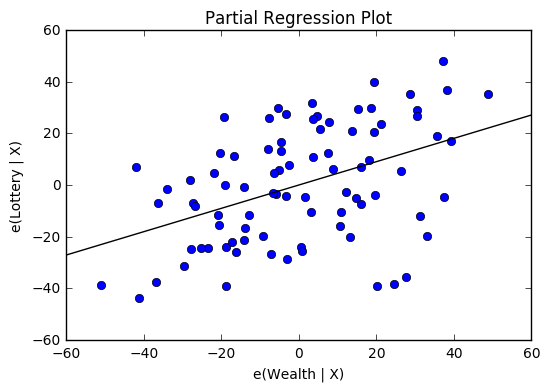

In [25]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                              data=df, obs_labels=False)